<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [27]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [28]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [29]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['Nan %'] = (df.isna().mean())*100
des




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
Nan %,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [30]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
print(f'Cantidad de filas: {df.shape[0]}, cantidad de columnas {df.shape[1]}')


Cantidad de filas: 891, cantidad de columnas 12


In [31]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df1 = df.copy()
df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df1.tail()


,Survived,Pclass,Sex,Age,SibSp,Parch
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0
890,0,3,male,32.0,0,0


In [32]:
# Alumno, elimine aquellas filas que tengan columnas vacias
des1 = df1.describe()
des1.loc['Nan'] = df1.isna().sum()
des1.loc['Nan %'] = (df1.isna().mean())*100

# Mostrar la tabla descriptiva antes de eliminar NaN
print("Estadísticas descriptivas antes de eliminar NaN:")
print(des1)

df1.dropna(inplace=True)
df1



Estadísticas descriptivas antes de eliminar NaN:
         Survived      Pclass         Age       SibSp       Parch
count  891.000000  891.000000  714.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594
std      0.486592    0.836071   14.526497    1.102743    0.806057
min      0.000000    1.000000    0.420000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000
50%      0.000000    3.000000   28.000000    0.000000    0.000000
75%      1.000000    3.000000   38.000000    1.000000    0.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000
Nan      0.000000    0.000000  177.000000    0.000000    0.000000
Nan %    0.000000    0.000000   19.865320    0.000000    0.000000


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [33]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print(f'Cantidad de filas para analizar, {df1.shape[0]}')

Cantidad de filas para analizar, 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [34]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0
890,0,3,male,32.0,0,0


In [35]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
df1['Survived'].value_counts()

,count
Survived,
0,424
1,290


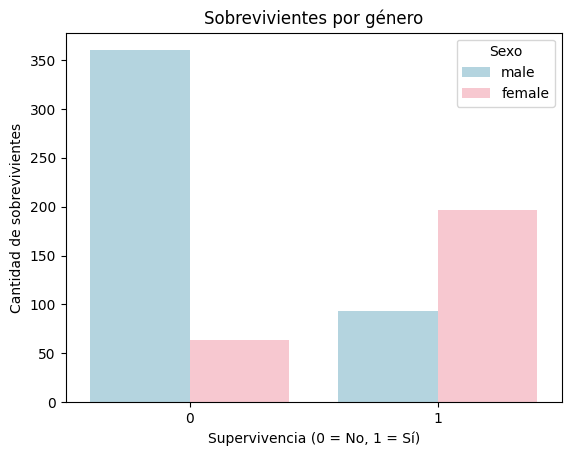

In [36]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Survived', hue='Sex', data=df1, palette={'male': 'lightblue', 'female': 'pink'})
plt.title('Sobrevivientes por género')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de sobrevivientes')
plt.legend(title='Sexo')
plt.show()

<ipython-input-37-863387f37221>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df1, palette='pastel')


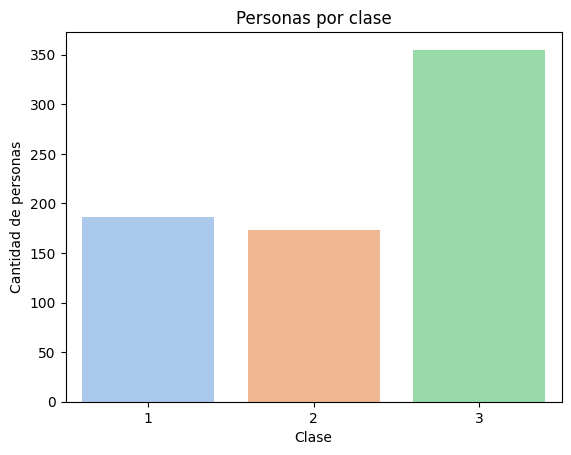

In [37]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x='Pclass', data=df1, palette='pastel')
plt.title('Personas por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de personas')
plt.show()



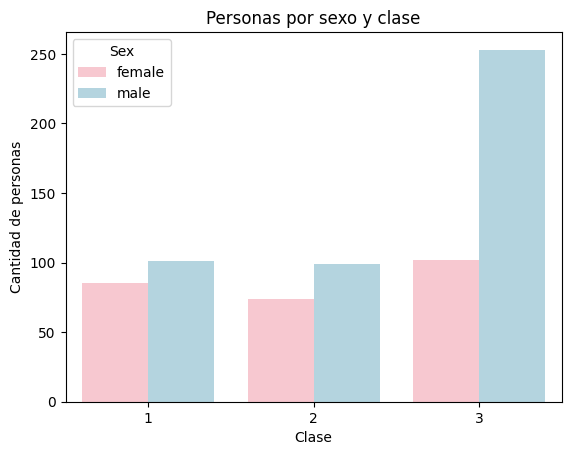

In [38]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Pclass', hue='Sex', data=df1, palette={'male': 'lightblue', 'female': 'pink'})
plt.title('Sexo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de personas')
plt.title('Personas por sexo y clase')
plt.show()


#### Transformar variables categóricas texto a clases numeradas

In [39]:
from sklearn.preprocessing import LabelEncoder



In [60]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df1.copy()
df_cod

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [61]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
# Inicializar LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'Sex'
df_cod['Sex_cod'] = le.fit_transform(df_cod['Sex'])

# Eliminar la columna original 'Sex'
df_cod = df_cod.drop(['Sex'], axis=1)

# Mostrar las últimas filas del DataFrame modificado
print(df_cod.tail())

     Survived  Pclass   Age  SibSp  Parch  Sex_cod
885         0       3  39.0      0      5        0
886         0       2  27.0      0      0        1
887         1       1  19.0      0      0        0
889         1       1  26.0      0      0        1
890         0       3  32.0      0      0        1


In [62]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print("Clases detectadas por el encoder:", le.classes_)


Clases detectadas por el encoder: ['female' 'male']


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [63]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_cod']].values
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [64]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

In [65]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, max_depth=5, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [66]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.8

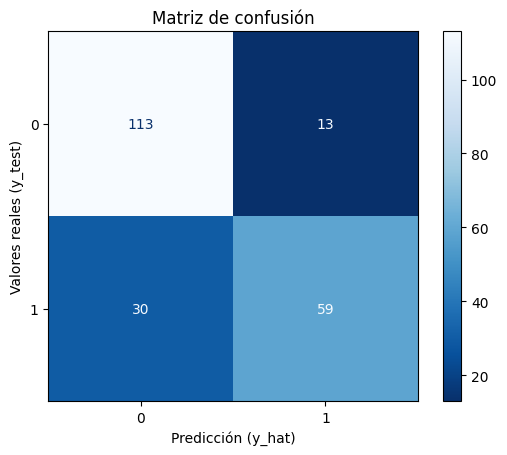

In [67]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)

cmd.plot(cmap=plt.cm.Blues_r)
plt.title('Matriz de confusión')
plt.xlabel('Predicción (y_hat)')
plt.ylabel('Valores reales (y_test)')
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

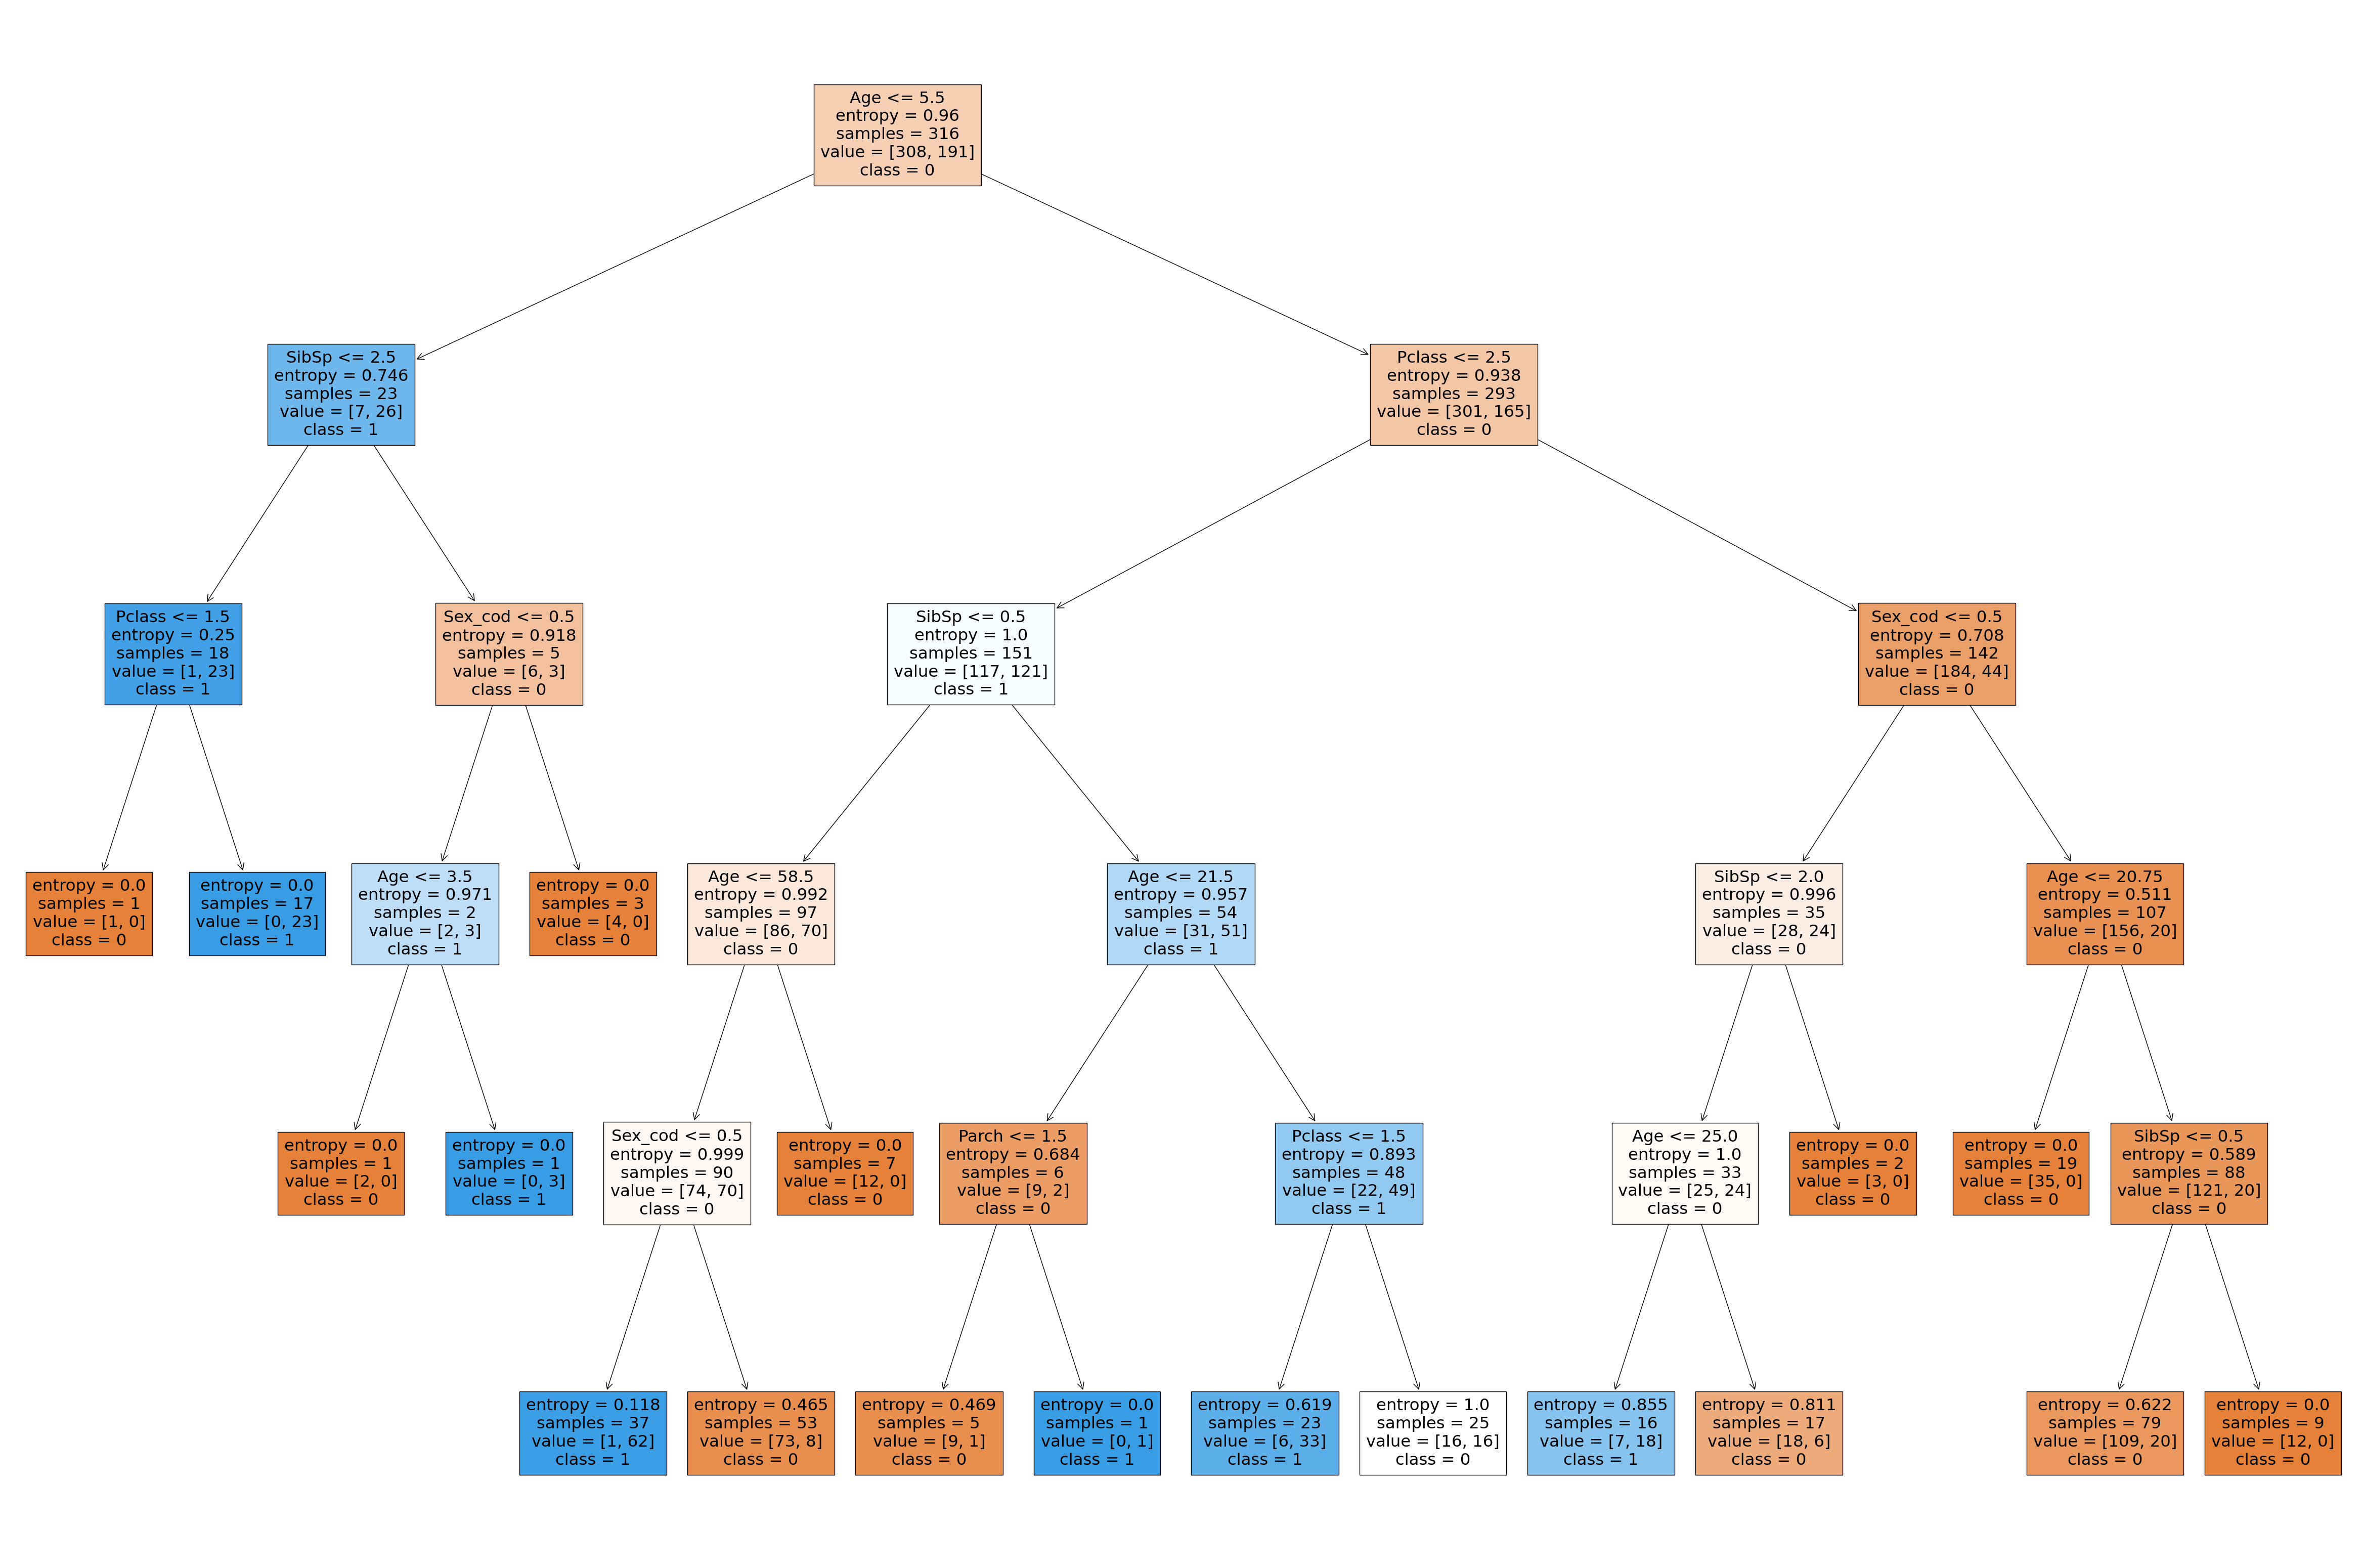

In [69]:
# Se importa tree de sklearn
from sklearn import tree

# Tomo el primer árbol de decisión del bosque para dibujar
estimator = clf.estimators_[0]

# Obtengo los nombres de las columnas utilizadas y las clases posibles
feature_names = df_cod.drop('Survived', axis=1).columns
class_names = df_cod['Survived'].unique().tolist()
class_names

# Se importa tree de sklearn
from sklearn import tree

# Tomo el primer árbol de decisión del bosque para dibujar
estimator = clf.estimators_[0]  ## estimator--> DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',random_state=209652396)

# Obtengo los nombres de las columnas utilizadas y las clases posibles
# del DataFrame "df_codificado" elimina la columna "Drug" y obtiene los nombres de las columnas
#features_names devuelve los nombre de las columnas--> Index(['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
#'BP_NORMAL','Cholesterol_HIGH', 'Cholesterol_NORMAL'], dtype='object')
feature_names = df_cod.drop('Survived', axis=1).columns

# Accede al DataFrame "df_codificado" a su columna "Drug"
# Con el método .unique() busca las categorías únicas
# y devuelve la información en una lista con el método .tolist()
# class_names las categorías que representan la columna---> ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
class_names = df_cod['Survived'].unique().tolist()

# Se crea el espacio para dibujar con fig = plt.figure(figsize=(16, 9))
# Se crea el espacio para el gráfico ax = fig.add_subplot()
class_names = [str(class_name) for class_name in df_cod['Survived'].unique().tolist()]

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot()

# tree, variable del árbol, accede al método plot_tree para representarlo graficamente
# Indicando los parámetros:
# estimator --> Cantidad de árboles, el primero indicado en estimator = clf.estimators_[0]
# feature_names = feature_names, los nombre de las columnas--> Index(['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
#'BP_NORMAL','Cholesterol_HIGH', 'Cholesterol_NORMAL'], dtype='object')
# class_names=class_names, class_names las categorías que representan la columna---> ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
# filles=True, Cuando se establece en True, pinta los nodos para indicar la clase mayoritaria para la clasificación.
# ax=ax, Ejes para trazar el gráfico.
# Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
tree.plot_tree(estimator,
               feature_names = feature_names,
               class_names=class_names,
               filled = True,
               ax=ax);
# Muetra la figura
plt.show()
# Nombre de la imagen
filename = 'survived.png'
# fig.savefig, guarda la imagen con el nombre asignado.
fig.savefig(filename)

In [80]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

df_prueba = pd.DataFrame({'Pclass': [2], 'Age': [37], 'SibSp': [1], 'Parch': [0], 'Sex': ['female']})

# Implementar el label encoder para transformar la columna 'Sex'
df_prueba['Sex'] = le.transform(df_prueba['Sex'])

# Asegurarse de que las columnas estén en el mismo orden y formato que el modelo espera
X_prueba = df_prueba[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex']].values

# Realizar la predicción con el modelo
y_hat_prueba = clf.predict(X_prueba)

# Mostrar la predicción
y_hat_prueba

array([1])